In [15]:
import pandas as pd
# cargar el dataset
df=pd.read_csv("data/ds_salaries.csv")
# mostrar las primeras filas
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [16]:
# Renombramos las columnas de ingles a español
df.rename(columns={
    "work_year": "año_trabajo",
    "experience_level": "nivel_experiencia",
    "employment_type": "tipo_empleo",
    "job_title": "puesto",
    "salary": "salario",
    "salary_currency": "moneda_sueldo",
    "salary_in_usd": "salario_usd",
    "employee_residence": "residencia_empleado",
    "remote_ratio": "porcentaje_remoto",
    "company_location": "ubicacion_empresa",
    "company_size": "tamaño_empresa"
}, inplace=True)
df.head()


,Unnamed: 0,año_trabajo,nivel_experiencia,tipo_empleo,puesto,salario,moneda_sueldo,salario_usd,residencia_empleado,porcentaje_remoto,ubicacion_empresa,tamaño_empresa
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
# Verificamis columnas y tipos de datos
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           607 non-null    int64 
 1   año_trabajo          607 non-null    int64 
 2   nivel_experiencia    607 non-null    object
 3   tipo_empleo          607 non-null    object
 4   puesto               607 non-null    object
 5   salario              607 non-null    int64 
 6   moneda_sueldo        607 non-null    object
 7   salario_usd          607 non-null    int64 
 8   residencia_empleado  607 non-null    object
 9   porcentaje_remoto    607 non-null    int64 
 10  ubicacion_empresa    607 non-null    object
 11  tamaño_empresa       607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,año_trabajo,nivel_experiencia,tipo_empleo,puesto,salario,moneda_sueldo,salario_usd,residencia_empleado,porcentaje_remoto,ubicacion_empresa,tamaño_empresa
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [18]:
#limpieza de nombres de columnas
df.columns=(df.columns
            .str.strip()
            .str.lower()
            .str.replace(' ','_')
            .str.replace('-','_')
            .str.replace('/','_')
            )

Analisis exploratorio de los datos
-Verificacion de valores nulos y tipos de datos 
- visualizacion: distribucion de empleos por año, nieles de experiencia mas comunes, salario promedio por nivel de experiencia, top 10 de paises con mas empleados.

In [19]:
#ver tipos de datos y valores nulos
df.info()
#ver valores nulos por columna
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unnamed:_0           607 non-null    int64 
 1   año_trabajo          607 non-null    int64 
 2   nivel_experiencia    607 non-null    object
 3   tipo_empleo          607 non-null    object
 4   puesto               607 non-null    object
 5   salario              607 non-null    int64 
 6   moneda_sueldo        607 non-null    object
 7   salario_usd          607 non-null    int64 
 8   residencia_empleado  607 non-null    object
 9   porcentaje_remoto    607 non-null    int64 
 10  ubicacion_empresa    607 non-null    object
 11  tamaño_empresa       607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


unnamed:_0             0
año_trabajo            0
nivel_experiencia      0
tipo_empleo            0
puesto                 0
salario                0
moneda_sueldo          0
salario_usd            0
residencia_empleado    0
porcentaje_remoto      0
ubicacion_empresa      0
tamaño_empresa         0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2760318999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="año_trabajo", palette="Blues")


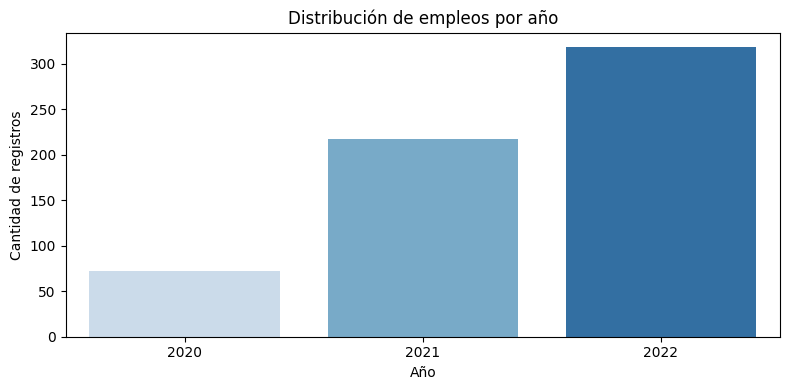

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="año_trabajo", palette="Blues")
plt.title("Distribución de empleos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de registros")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2442985780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="nivel_experiencia", palette="Greens")


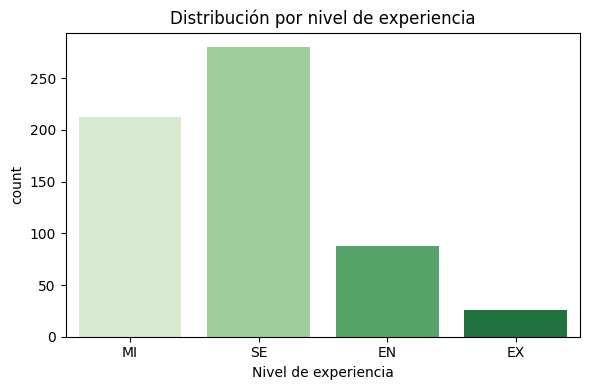

In [21]:
# Niveles de experiencia más comunes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="nivel_experiencia", palette="Greens")
plt.title("Distribución por nivel de experiencia")
plt.xlabel("Nivel de experiencia")
plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2562235968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="nivel_experiencia", y="salario_usd", data=df, estimator='mean', palette="Oranges")


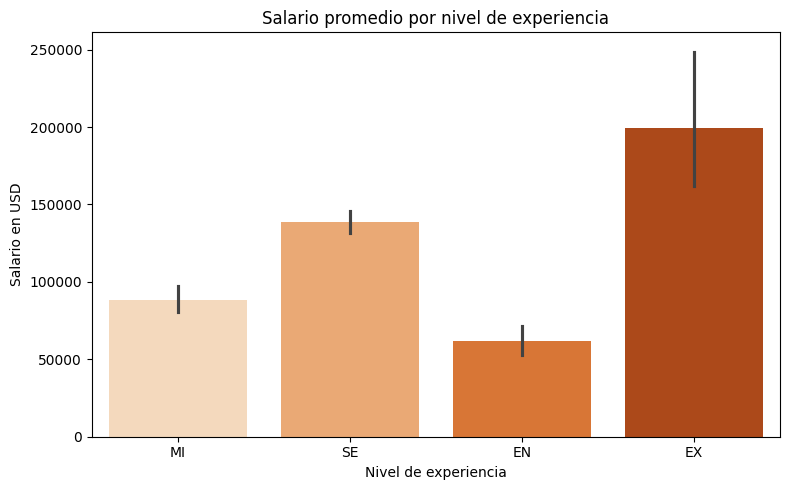

In [22]:
#salario promedio por nivel de experiencia
df.groupby("nivel_experiencia")["salario_usd"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x="nivel_experiencia", y="salario_usd", data=df, estimator='mean', palette="Oranges")
plt.title("Salario promedio por nivel de experiencia")
plt.ylabel("Salario en USD")
plt.xlabel("Nivel de experiencia")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2998776115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.index, y=top_paises.values, palette="viridis")


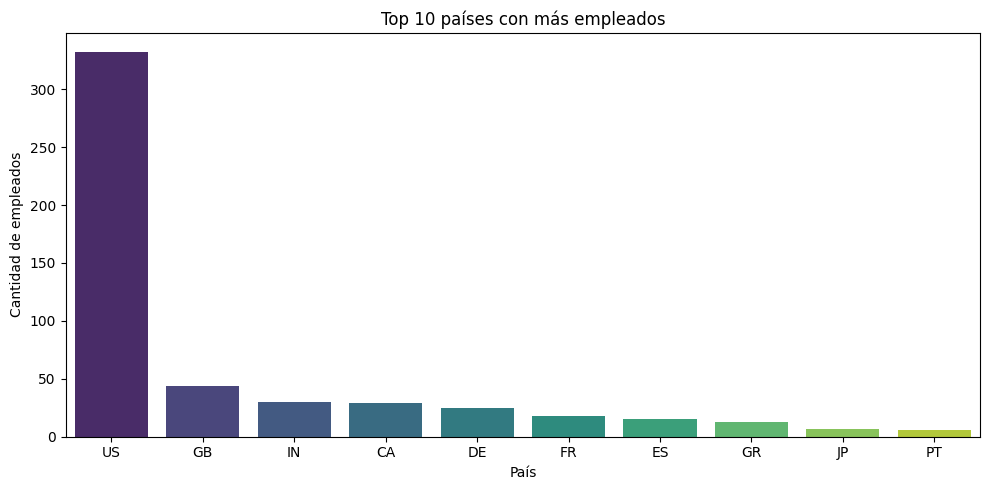

In [23]:
# Top 10 paises con mas empleados
top_paises = df["residencia_empleado"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_paises.index, y=top_paises.values, palette="viridis")
plt.title("Top 10 países con más empleados")
plt.ylabel("Cantidad de empleados")
plt.xlabel("País")
plt.tight_layout()
plt.show()
